In [1]:
library(Seurat)
library(ComplexHeatmap)
library(circlize)
library(dplyr)
library(tibble)
library(viridis)
source("./heatmap.fun.R")

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘dplyr’


The following objec

In [2]:
load(file = paste0("./load_files/", "Module_continuous_expr_deep_E60-70.Rdata"))
##e67_avgs, e67_pmeta, e67_avg_smt, e67_svg_smt, e67_meta_smt

In [3]:
## Reorder org_smt columns, put TC after OC
smt_new_ord <- lapply(c("FC", "MSC", "OC", "TC"), function(x) {
    yy <- colnames(e67_svg_smt)[grepl(paste0("^", x, "\\|"), colnames(e67_svg_smt))]
    return(yy)
    }) %>%
    unlist()
e67_svg_smt <- e67_svg_smt[, smt_new_ord]
e67_meta_smt <- e67_meta_smt[smt_new_ord, ]
unique(e67_meta_smt$region)

[1] "FC"  "MSC" "OC"  "TC"

In [4]:
##----------------------------------------------------------------
## Find region-specific genes (not considering region-shared)
load(file = paste0("./load_files/", "Module_pairwise_pie.dot_deep.Rdata"))
##piei, 


fpie <- piei %>%
        filter(Shared == 0) %>%
        group_by(gene) %>%
        mutate(ismax = ifelse(radius == max(radius), 1, 0)) %>%
        ungroup() %>%
        filter(ismax == 1) %>%
        mutate(regsum = FC + MSC + TC + OC)


reg_ord <- c("FC", "MSC", "OC", "TC")
spec_list <- lapply(reg_ord, function(reg) {
    genes <- fpie %>%
                filter(!!sym(reg) == 1) %>%
                filter(regsum == 1) %>%
                .$gene %>% unique()
    return(genes)
    }) %>%
        setNames(., reg_ord)
summary(spec_list)
spec_list

    Length Class  Mode     
FC  168    -none- character
MSC  25    -none- character
OC   52    -none- character
TC   83    -none- character

$FC
  [1] "LMO4"         "CXXC4"        "PCDH17"       "LSAMP"        "TMEFF2"      
  [6] "SULF2"        "TMEFF1"       "LOC114671965" "PPA2"         "ELMO1"       
 [11] "CBLN2"        "KCNV1"        "POU6F2"       "GRM5"         "SYN3"        
 [16] "YBX3"         "GAREM1"       "NEGR1"        "HIKESHI"      "POU3F2"      
 [21] "PBX1"         "LOC721629"    "TET2"         "EFR3B"        "LOC696998"   
 [26] "NRIP1"        "LOC114679014" "KIAA1211"     "LRRTM2"       "MYT1L"       
 [31] "NAV3"         "PELI1"        "ROBO1"        "ARL9"         "RAC3"        
 [36] "TUBB4A"       "TOX3"         "PPM1E"        "LOC701364"    "RBM7"        
 [41] "ARGLU1"       "FAM110B"      "GNPTAB"       "GPR85"        "RAB11A"      
 [46] "NOL4"         "PDE4D"        "PCDHAC2"      "PRSS23"       "ZEB2"        
 [51] "NAP1L3"       "ENC1"         "CLMP"         "FEM1B"        "EPHA4"       
 [56] "EPHB6"        "L1CAM"        "AK1"          "PHC2"         "IGFBP5"      
 [61] "SPOCK1"       "RGMA"         "NOVA1"        "DAAM1"        "LOC694405"   
 [66] "MIEN1"        "LOC106999276" "NAV2"         "DUSP4"        "ORC4"        
 [71] "FKBP7"        "PTPRO"        "NTRK3"        "ATP1B1"       "RHOBTB3"     
 [76] "IRF2BP2"      "COX7A2"       "USP22"        "SATB1"        "ATP2B1"      
 [81] "NETO2"        "PPP1R1B"      "THSD7A"       "SLIT3"        "ETV1"        
 [86] "HBEGF"        "CSMD1"        "RYBP"         "GABBR2"       "TGFB2"       
 [91] "GRP"          "CALD1"        "TMEM127"      "CHCHD1"       "NELL1"       
 [96] "SESTD1"       "GALNT2"       "MRTFB"        "PPP2R1B"      "PCDH10"      
[101] "NRCAM"        "CPLX2"        "ARPP21"       "FNIP2"        "ZNF827"      
[106] "VGLL4"        "MTUS1"        "CTSB"         "FAM241B"      "AKR1B1"      
[111] "FAM155A"      "KCTD12"       "ADGRG1"       "ADGRL3"       "TRIM36"      
[116] "TCEAL2"       "UBE2H"        "SRGAP1"       "ALKBH7"       "CCDC50"      
[121] "RASAL2"       "DOCK4"        "ACVR2A"       "RAB9B"        "NAV1"        
[126] "GUCY1A2"      "WLS"          "NPY1R"        "ST6GAL2"      "PTPRN2"      
[131] "COX19"        "BLCAP"        "CNN3"         "ZNF385D"      "ALCAM"       
[136] "KHDRBS3"      "ANK2"         "PCP4"         "PHYHIPL"      "SORCS1"      
[141] "TMEM178A"     "MACROD2"      "KLHL5"        "GPR22"        "LOC707695"   
[146] "CDH11"        "ATP6"         "RPS4Y1"       "PMP22"        "FLYWCH2"     
[151] "LOC114669724" "HOPX"         "HAPLN1"       "COX2"         "MDK"         
[156] "MAPT"         "AK3"          "COX1"         "PGAP1"        "RBP1"        
[161] "APP"          "MSMO1"        "PPP1R14B"     "BCL2L1"       "EPHA5"       
[166] "SLC1A3"       "EOMES"        "PDLIM7"      

$MSC
 [1] "CHRDL1"    "GABRB2"    "ADGRL2"    "GLRX5"     "RBFOX1"    "CHGA"     
 [7] "EFNA5"     "OPCML"     "NECAB1"    "ANKRD12"   "PNMA1"     "TMEM132B" 
[13] "GON7"      "RHEB"      "GRM3"      "COX7A2L"   "ATXN1"     "TIMM9"    
[19] "PFN1"      "LOC707085" "E2F1"      "EVL"       "LOC716204" "SAFB"     
[25] "PAIP2"    

$OC
 [1] "FEZF2"        "PPP2R2B"      "NUDT1"        "DACT1"        "GRIK3"       
 [6] "SEPTIN11"     "QKI"          "SEZ6"         "NPTX1"        "SOX5"        
[11] "EPB41L3"      "KIF26A"       "STT3B"        "ACBD6"        "FOXO6"       
[16] "ANP32B"       "SLC17A7"      "NDUFV3"       "CNTNAP2"      "XPR1"        
[21] "ARL4D"        "SAT2"         "PPP1R17"      "C2H3orf14"    "DBI"         
[26] "LMO1"         "FAM181B"      "LOC100425072" "LOC106998813" "VSNL1"       
[31] "LOC698942"    "RPS12.1"      "GUCY1A1"      "LOC106996680" "ADAMTS3"     
[36] "TENM2"        "RBPJ"         "SHISA6"       "SIPA1L2"      "KCNK12"      
[41] "WNT7B"        "C14H11orf96"  "NFIX"         "NEUROD6"      "B3GAT2"      
[46] "H1F0"         "MAD2L2"       "MDFI"         "SRSF5"        "LOC713582"   
[51] "HMGN2"        "EMX1"        

$TC
 [1] "NKAIN3"       "NTM"          "MYL6"         "EFNB2"        "C7H14orf132" 
 [6] "GPC2"     

In [5]:
## Impulse fit to get gene orders
timeFile <- paste0("./load_files/", "Module_timing_deep.rds")
if (!file.exists(timeFile)){
    library(URD)
    timeres <- lapply(names(spec_list), function(reg) {
        reg_genes <- spec_list[[reg]]
        submeta <- e67_pmeta[e67_pmeta$lobe == reg, ]
        ptime <- submeta$pseudotime
        expr <- as.matrix(e67_avgs)[reg_genes, rownames(submeta)]
        sub_fit <- lapply(reg_genes, function(gg) {
            print(paste0("Working on gene: ", which(reg_genes == gg), " / ", length(reg_genes)))
            ff <- tryCatch(expr = {
                        impulseFit(x = ptime, y = expr[gg, ], k = 20, interpolate = 50)
                    }, 
                    error = function(cond) {
                        impulseFit(x = ptime, y = expr[gg, ], k = 15, interpolate = 50)
                    })
            return(ff)
        }) %>%
            setNames(., reg_genes)
        # Get out onset/offset times  
        timing <- data.frame(
                    time.on=unlist(lapply(sub_fit, function(x) {
                        if (is.list(x)) {
                            return(min(x[['time.on']]))
                        } else{
                            return(x['time.on'])
                        }
                        })),
                    time.off=unlist(lapply(sub_fit, function(x) {
                        if (is.list(x)) {
                            return(max(x[['time.off']]))
                        } else {
                            return(x['time.off'])
                        }
                        })),
                    row.names = reg_genes, 
                    region = reg,
                    stringsAsFactors = FALSE)
        timing[intersect(which(is.na(timing$time.on)), which(is.infinite(timing$time.off))), "time.on"] <- Inf
        timing
        }) %>%
        do.call(rbind, .)

    saveRDS(timeres, file = timeFile)
}

timeres <- readRDS(timeFile)

In [6]:
## Genearte gene order based on the impulse fit timing results
order_genes <- split(timeres, timeres$region) %>%
                lapply(., function(x) rownames(x)[order(x$time.on, x$time.off, decreasing = FALSE)]) %>%
                .[c("FC", "MSC", "OC", "TC")]
order_genes 

$FC
  [1] "FLYWCH2"      "LOC114669724" "SLC1A3"       "MDK"          "RBP1"        
  [6] "AK3"          "EOMES"        "CALD1"        "CNN3"         "FKBP7"       
 [11] "COX1"         "AKR1B1"       "COX7A2"       "PHC2"         "POU3F2"      
 [16] "PPP1R14B"     "NRIP1"        "CCDC50"       "PMP22"        "HAPLN1"      
 [21] "IGFBP5"       "TGFB2"        "COX19"        "CPLX2"        "LOC701364"   
 [26] "RBM7"         "RAB11A"       "PCDHAC2"      "MIEN1"        "RHOBTB3"     
 [31] "ZNF827"       "VGLL4"        "UBE2H"        "RASAL2"       "DOCK4"       
 [36] "NAV1"         "LOC694405"    "L1CAM"        "MTUS1"        "ARL9"        
 [41] "ALKBH7"       "BCL2L1"       "TCEAL2"       "CLMP"         "APP"         
 [46] "EPHA4"        "TMEFF1"       "USP22"        "PGAP1"        "MSMO1"       
 [51] "ROBO1"        "ENC1"         "AK1"          "TUBB4A"       "CDH11"       
 [56] "MYT1L"        "SRGAP1"       "ST6GAL2"      "ADGRG1"       "EPHB6"       
 [61] "PDLIM7"       "EPHA5"        "FAM241B"      "MAPT"         "THSD7A"      
 [66] "PTPRO"        "RAB9B"        "LOC114679014" "GPR85"        "FEM1B"       
 [71] "PDE4D"        "BLCAP"        "RAC3"         "ADGRL3"       "NOL4"        
 [76] "ZEB2"         "PRSS23"       "TRIM36"       "ARPP21"       "EFR3B"       
 [81] "GUCY1A2"      "GNPTAB"       "TET2"         "ATP2B1"       "NAV3"        
 [86] "FNIP2"        "TMEM127"      "GAREM1"       "DAAM1"        "SPOCK1"      
 [91] "PTPRN2"       "DUSP4"        "TOX3"         "ANK2"         "FAM155A"     
 [96] "KIAA1211"     "IRF2BP2"      "RGMA"         "PCDH17"       "PELI1"       
[101] "LOC106999276" "LMO4"         "PPM1E"        "NAV2"         "LRRTM2"      
[106] "FAM110B"      "YBX3"         "KHDRBS3"      "PBX1"         "LOC696998"   
[111] "PCDH10"       "KLHL5"        "LSAMP"        "NAP1L3"       "PPP1R1B"     
[116] "PPA2"         "KCNV1"        "CXXC4"        "GRM5"         "NRCAM"       
[121] "KCTD12"       "HIKESHI"      "CHCHD1"       "NPY1R"        "SYN3"        
[126] "CBLN2"        "NTRK3"        "LOC707695"    "LOC114671965" "ATP1B1"      
[131] "SORCS1"       "NEGR1"        "LOC721629"    "POU6F2"       "GABBR2"      
[136] "ELMO1"        "ZNF385D"      "TMEFF2"       "SULF2"        "GPR22"       
[141] "HBEGF"        "MACROD2"      "SATB1"        "GALNT2"       "ALCAM"       
[146] "RPS4Y1"       "TMEM178A"     "WLS"          "PPP2R1B"      "PCP4"        
[151] "ACVR2A"       "MRTFB"        "RYBP"         "CTSB"         "NELL1"       
[156] "NOVA1"        "ORC4"         "CSMD1"        "ETV1"         "ATP6"        
[161] "SESTD1"       "COX2"         "SLIT3"        "PHYHIPL"      "NETO2"       
[166] "HOPX"         "ARGLU1"       "GRP"         

$MSC
 [1] "PFN1"      "E2F1"      "RHEB"      "LOC707085" "GLRX5"     "PAIP2"    
 [7] "LOC716204" "SAFB"      "COX7A2L"   "RBFOX1"    "CHRDL1"    "EVL"      
[13] "ANKRD12"   "OPCML"     "ADGRL2"    "GABRB2"    "GRM3"      "ATXN1"    
[19] "TIMM9"     "EFNA5"     "NECAB1"    "CHGA"      "PNMA1"     "TMEM132B" 
[25] "GON7"     

$OC
 [1] "NUDT1"        "ANP32B"       "B3GAT2"       "MDFI"         "HMGN2"       
 [6] "DBI"          "SRSF5"        "EMX1"         "MAD2L2"       "LOC713582"   
[11] "LOC100425072" "LOC698942"    "RPS12.1"      "NFIX"         "PPP1R17"     
[16] "NEUROD6"      "SEZ6"         "ARL4D"        "XPR1"         "C2H3orf14"   
[21] "SAT2"         "CNTNAP2"      "SLC17A7"      "LOC106998813" "FOXO6"       
[26] "PPP2R2B"      "KIF26A"       "NPTX1"        "LMO1"         "SOX5"        
[31] "SEPTIN11"     "EPB41L3"      "NDUFV3"       "ACBD6"        "DACT1"       
[36] "QKI"          "FEZF2"        "GRIK3"        "STT3B"        "KCNK12"      
[41] "C14H11orf96"  "FAM181B"      "TENM2"        "SHISA6"       "WNT7B"       
[46] "RBPJ"         "SIPA1L2"      "VSNL1"        "LOC106996680" "ADAMTS3"     
[51] "H1F0"         "GUCY1A1"     

$TC
 [1] "ASCL1"        "CDO1"         "DDT"          "INSM1"        "CTNNB1"      
 [6] "NR2F1"    

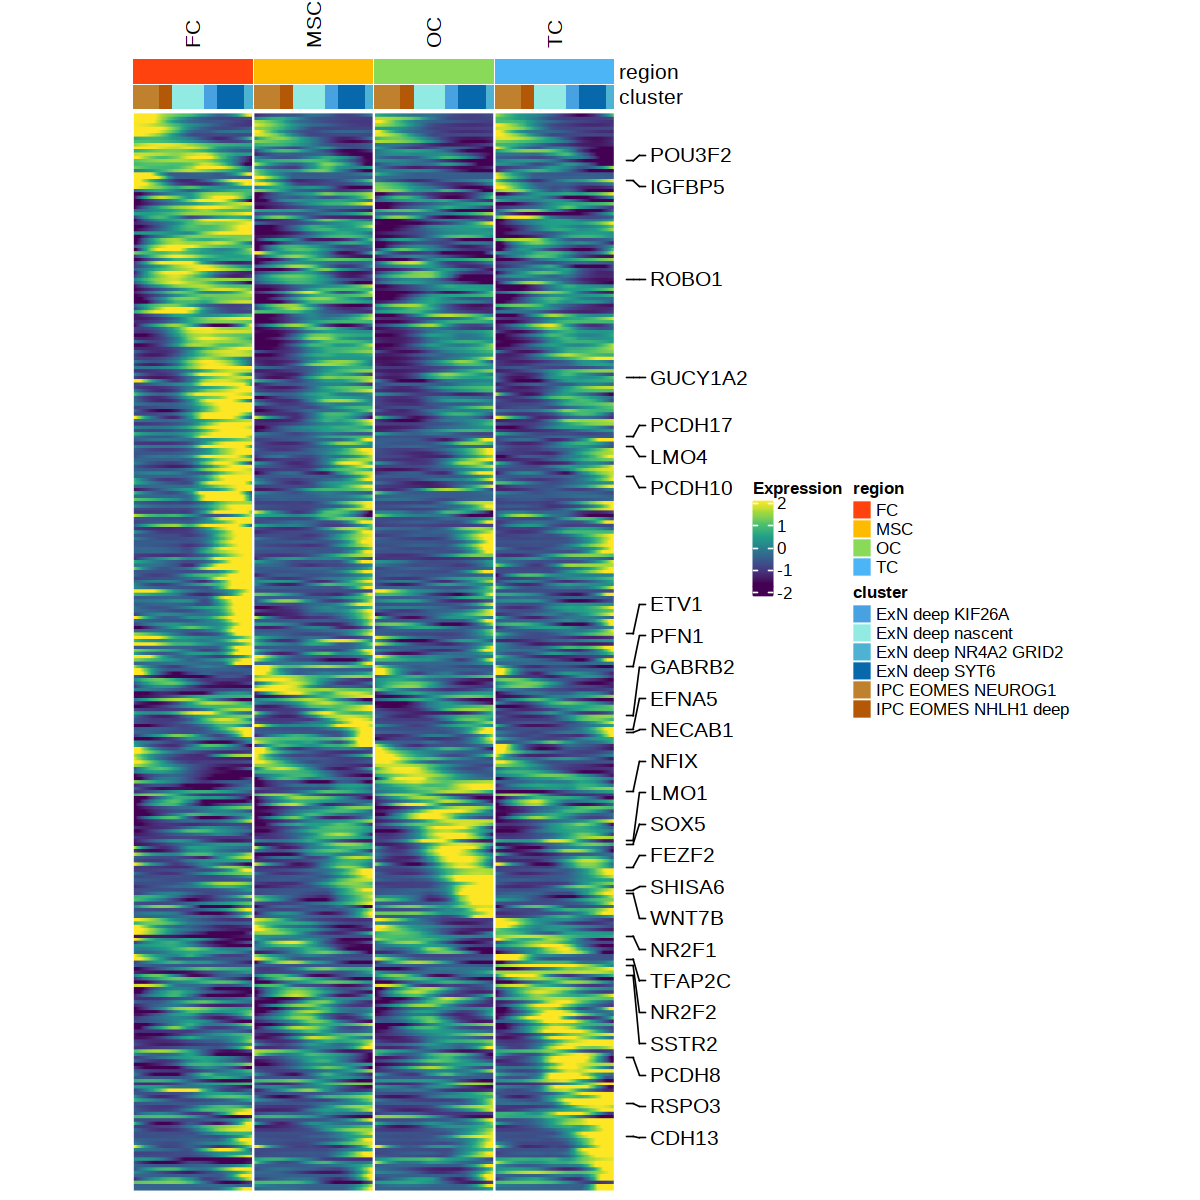

In [7]:
allpgenes <- unlist(order_genes) %>% unname()
sel_genes <- c("PCDH10", "SATB2", "IGFBP5", "GUCY1A2", "ETV1", "PCDH17", 
               "ROBO1", "POU3F2", "RND3", "LMO4", "POU3F2", "CYP26A1",  
               "PFN1", "GABRB2", "NECAB1", "EFNA5", "PLXDC2", "NR2F1", 
               "NR2F2", "PLXDC2", "PCDH17", "VCAN", "RSPO3", "SSTR2", 
               "TFAP2C", "PCDH8" ,"CDH13", "WNT7B", "AUTS2", "MN1", 
               "SHISA6", "SOX5", "LMO1", "FEZF2", "NFIX") %>% 
            unique() %>% 
            intersect(allpgenes, .)
rsplit <- rep(c("FC", "MSC", "OC", "TC"), sapply(order_genes, length)) %>%
            unlist() %>% unname() %>%
            factor(., levels = c("FC", "MSC", "OC", "TC"))
ht_expr <- plot_heatmap.continuous(mat = e67_svg_smt[allpgenes, ], 
                                   meta = e67_meta_smt, 
                                   label_genes = sel_genes, 
                                   color_breaks = seq(-1.5, 2, 0.5), 
                                   pdf_height = 5, row_split = NULL) ## row_split should be set to rsplit, it will 
                                    ##introduce errors in jupyter notebook
options(repr.plot.width=10, repr.plot.height=10)
draw(ht_expr)

In [8]:
pdf("./report/geneflow_deep.v2.pdf", width = 10, height = 5)
ht_expr <- plot_heatmap.continuous(mat = e67_svg_smt[allpgenes, ], 
                                   meta = e67_meta_smt, 
                                   label_genes = sel_genes, 
                                   color_breaks = seq(-1.5, 2, 0.5), 
                                   pdf_height = 5, row_split = rsplit)
draw(ht_expr)
dev.off()

png 
  2

In [9]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scatterpie_0.1.5      foreach_1.5.0         ggpubr_0.3.0         
 [4] ggplot2_3.3.0         GetoptLong_0.1.8      WGCNA_1.69           
 [7] fastcluster_1.1.25    dynamicTreeCut_1.63-1 viridis_0.5.1        
[10] viridisLite_0.3.0  